# Laboratorio N°1 Machine Learning (PCA - Kmeans - Clustering Jerárquico)

            

## Objetivo:

- Ajustar PCA, Kmeans y realizar análisis de clustering jerárquico para explicar los distintos tipos de cancer en la base de sklearn “load_breast_cancer()”.
- Obtener la paleta de colores básicos de una imagen .jpg, reconstruyendo la imagen, solo con los colores de la paleta escogidos por los clustering.


## Importar librerias

In [1]:
!pip install scikit-image

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from skimage import io
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import AgglomerativeClustering as HClust

# Cancer de Pecho (Breast Cancer)

## Cargar dataset 'breast cancer' y transformar a Data Frame

In [3]:
#Cargar el dataset 
cancer=load_breast_cancer()

#Convertir el objeto en Data Frame:
df_cancer=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
df_cancer['target']=cancer.target


In [4]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


La dimensionalidad de los datos es (5,31), eso significa que hay 5 filas, y cada una de ellas es descrita por 31 dimensiones.

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
#Cantidad de datos catalogados como target (0) y (1)
df_cancer['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

Hay 357 datos correspondientes a target 1 y 212 datos de target 0

## Normalización (previo a PCA)

In [7]:
X_std=StandardScaler().fit_transform(df_cancer.drop(columns=['target'])) #Normalización de los datos, descartando la columa 'target'

Ahora el dataset está preparado para reducir su tamaño. 

## Análisis de Componentes Principales (PCA):

Considerando que se pueden especificar cualquier número de componentes (siempre y cuando sea menor al número total de dimensiones en el dataset original), para este caso, se busca explicar los distintos tipos de cancer presentes en el dataset, asumiendo que se busca el 'Maligno' y 'Benigno, se eligirán 2 componentes.

In [8]:
pca = PCA(n_components=2)
vecs=pca.fit_transform(X_std)

Ahora, se transformará la pequeña versión del Dataframe creada en un nuevo DataFrame con los componentes principales y la columna target:

In [9]:
reduced_df_cancer=pd.DataFrame(data=vecs,columns=['Principal Component 1','Principal Component 2'])
final_df=pd.concat([reduced_df_cancer,df_cancer[['target']]],axis=1)


In [10]:
final_df.head()

,Principal Component 1,Principal Component 2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


El Componente principal 1 y Componente Principal 2 son las dimensiones de salida del PCA, los cuales se mostrarán a continuación mediante un gráfico de dispersión:

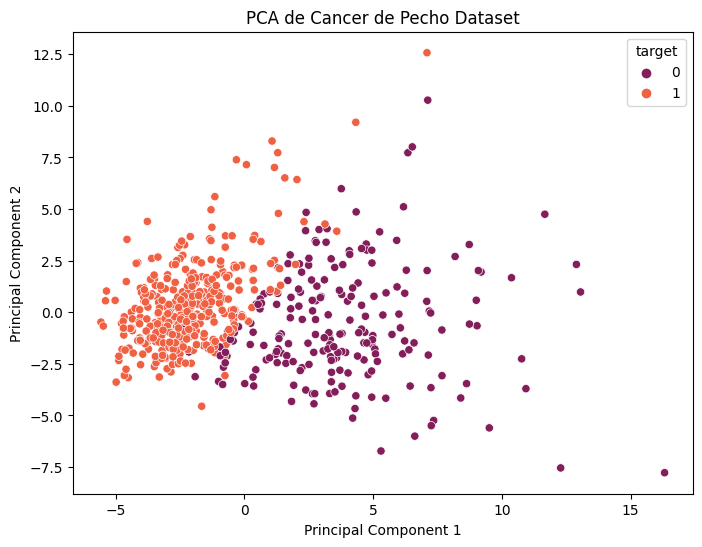

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='target', data=final_df, palette='rocket')
plt.title('PCA de Cancer de Pecho Dataset')
plt.show()

- Este gráfico muestra la diferencia entre los datos analizados con sus multiples variables, pero reducido a solo 02 por el PCA.
- PCA retiene la información relevante y a la vez reduce el ruido en el dataset.


## Algoritmo K-means:

### Asignar centroides y calcular el SSE para diferentes valores de clusters (k):

c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

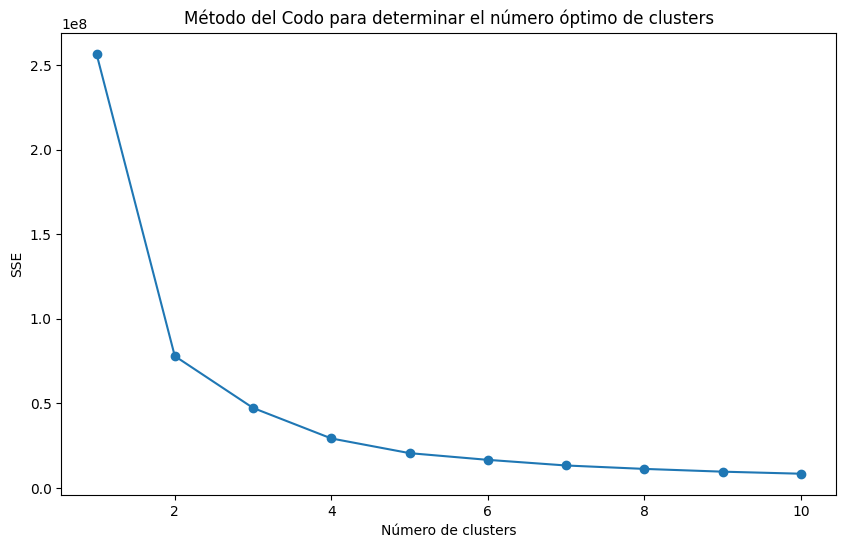

In [12]:

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cancer)
    sse.append(kmeans.inertia_)
# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.show()

Para este caso el número de clusters elegido es 2, punto de inflexión de la curva (Suma de los errores cuadráticos vs n° clusters)

c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


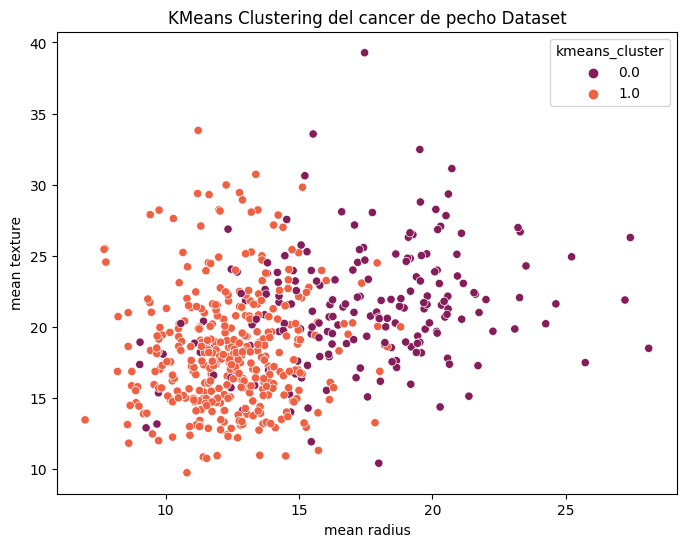

In [35]:


# Cargar el dataset de cáncer de mama
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

# Normalización de los datos, descartando la columna 'target'
X_std = StandardScaler().fit_transform(df_cancer.drop(columns=['target']))

# Aplicar KMeans
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_cancer['kmeans_cluster'] = kmeans.fit_predict(X_std)

# Para que los colores coincidan con las etiquetas reales, podemos mapear las etiquetas de clúster de KMeans a las etiquetas reales
mapping = {}
for cluster in range(n_clusters):
    mode = df_cancer[df_cancer['kmeans_cluster'] == cluster]['target'].mode()[0]
    mapping[cluster] = mode
df_cancer['kmeans_cluster'] = df_cancer['kmeans_cluster'].map(mapping)

# Graficar los resultados de KMeans
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cancer.columns[0], y=df_cancer.columns[1], hue='kmeans_cluster', data=df_cancer, palette='rocket')
plt.title('KMeans Clustering del cancer de pecho Dataset')
plt.show()

Como se puede visualizar en el gráfico anterior, no se identifican patrones bien definidos que permitan diferenciar ambos target, los puntos de cada cluster se ven mezclados. Por lo que se procederá a utilizar otro enfoque, se aplicará el algoritmo k-means al resultado de PCA.

In [44]:
#Metodo del codo.

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_df)
    sse.append(kmeans.inertia_)

c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

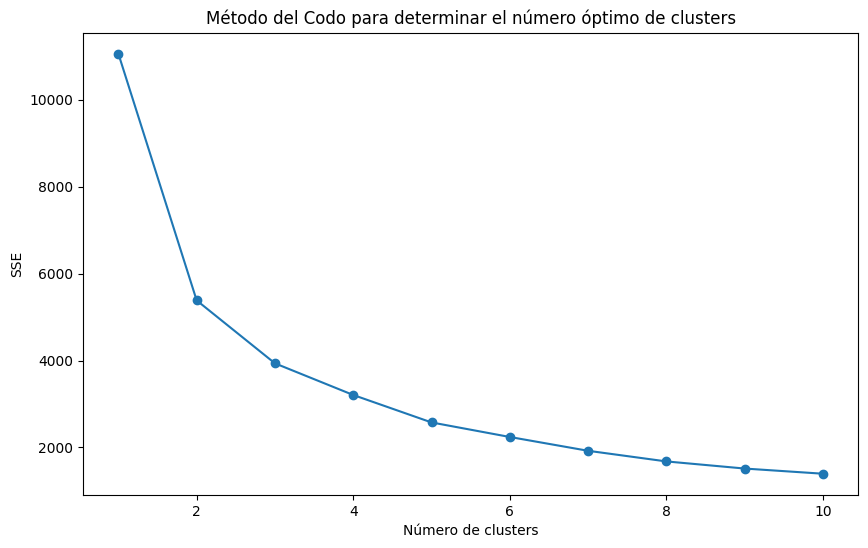

In [45]:
# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.show()

In [28]:
final_df.head()

,Principal Component 1,Principal Component 2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


In [29]:
# Aplicar KMeans al PCA:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
final_df['kmeans_cluster'] = kmeans.fit_predict(X_std)

c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
final_df['kmeans_cluster'].replace({0: 1, 1: 0}, inplace=True)


In [42]:
final_df.head()

,Principal Component 1,Principal Component 2,target,kmeans_cluster
0,9.192837,1.948583,0,0
1,2.387802,-3.768172,0,0
2,5.733896,-1.075174,0,0
3,7.122953,10.275589,0,0
4,3.935302,-1.948072,0,0


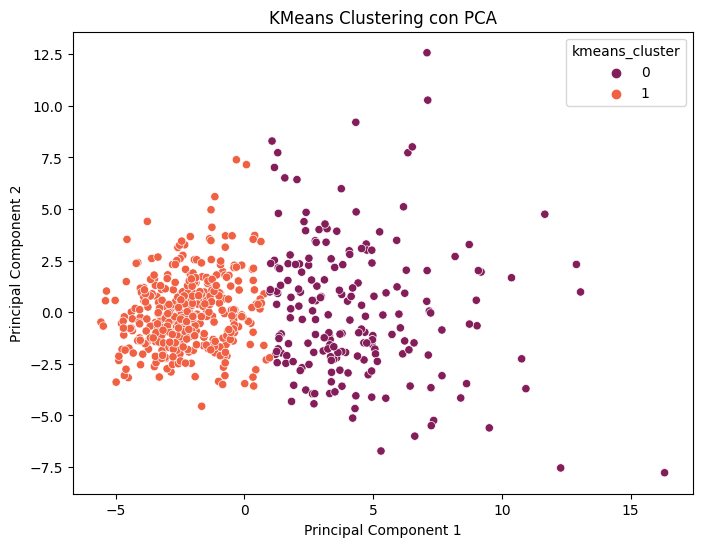

In [43]:
# Visualizar los resultados de KMeans junto con PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='kmeans_cluster', data=final_df, palette='rocket')
plt.title('KMeans Clustering con PCA')
plt.show()


Al visualizar el gráfico anterior (K-means posterior a PCA), se puede ver una segmentación mas clara entre los cluster, en comparación a la aplicación de K-means por si sola.


## Clustering Jerárquico:


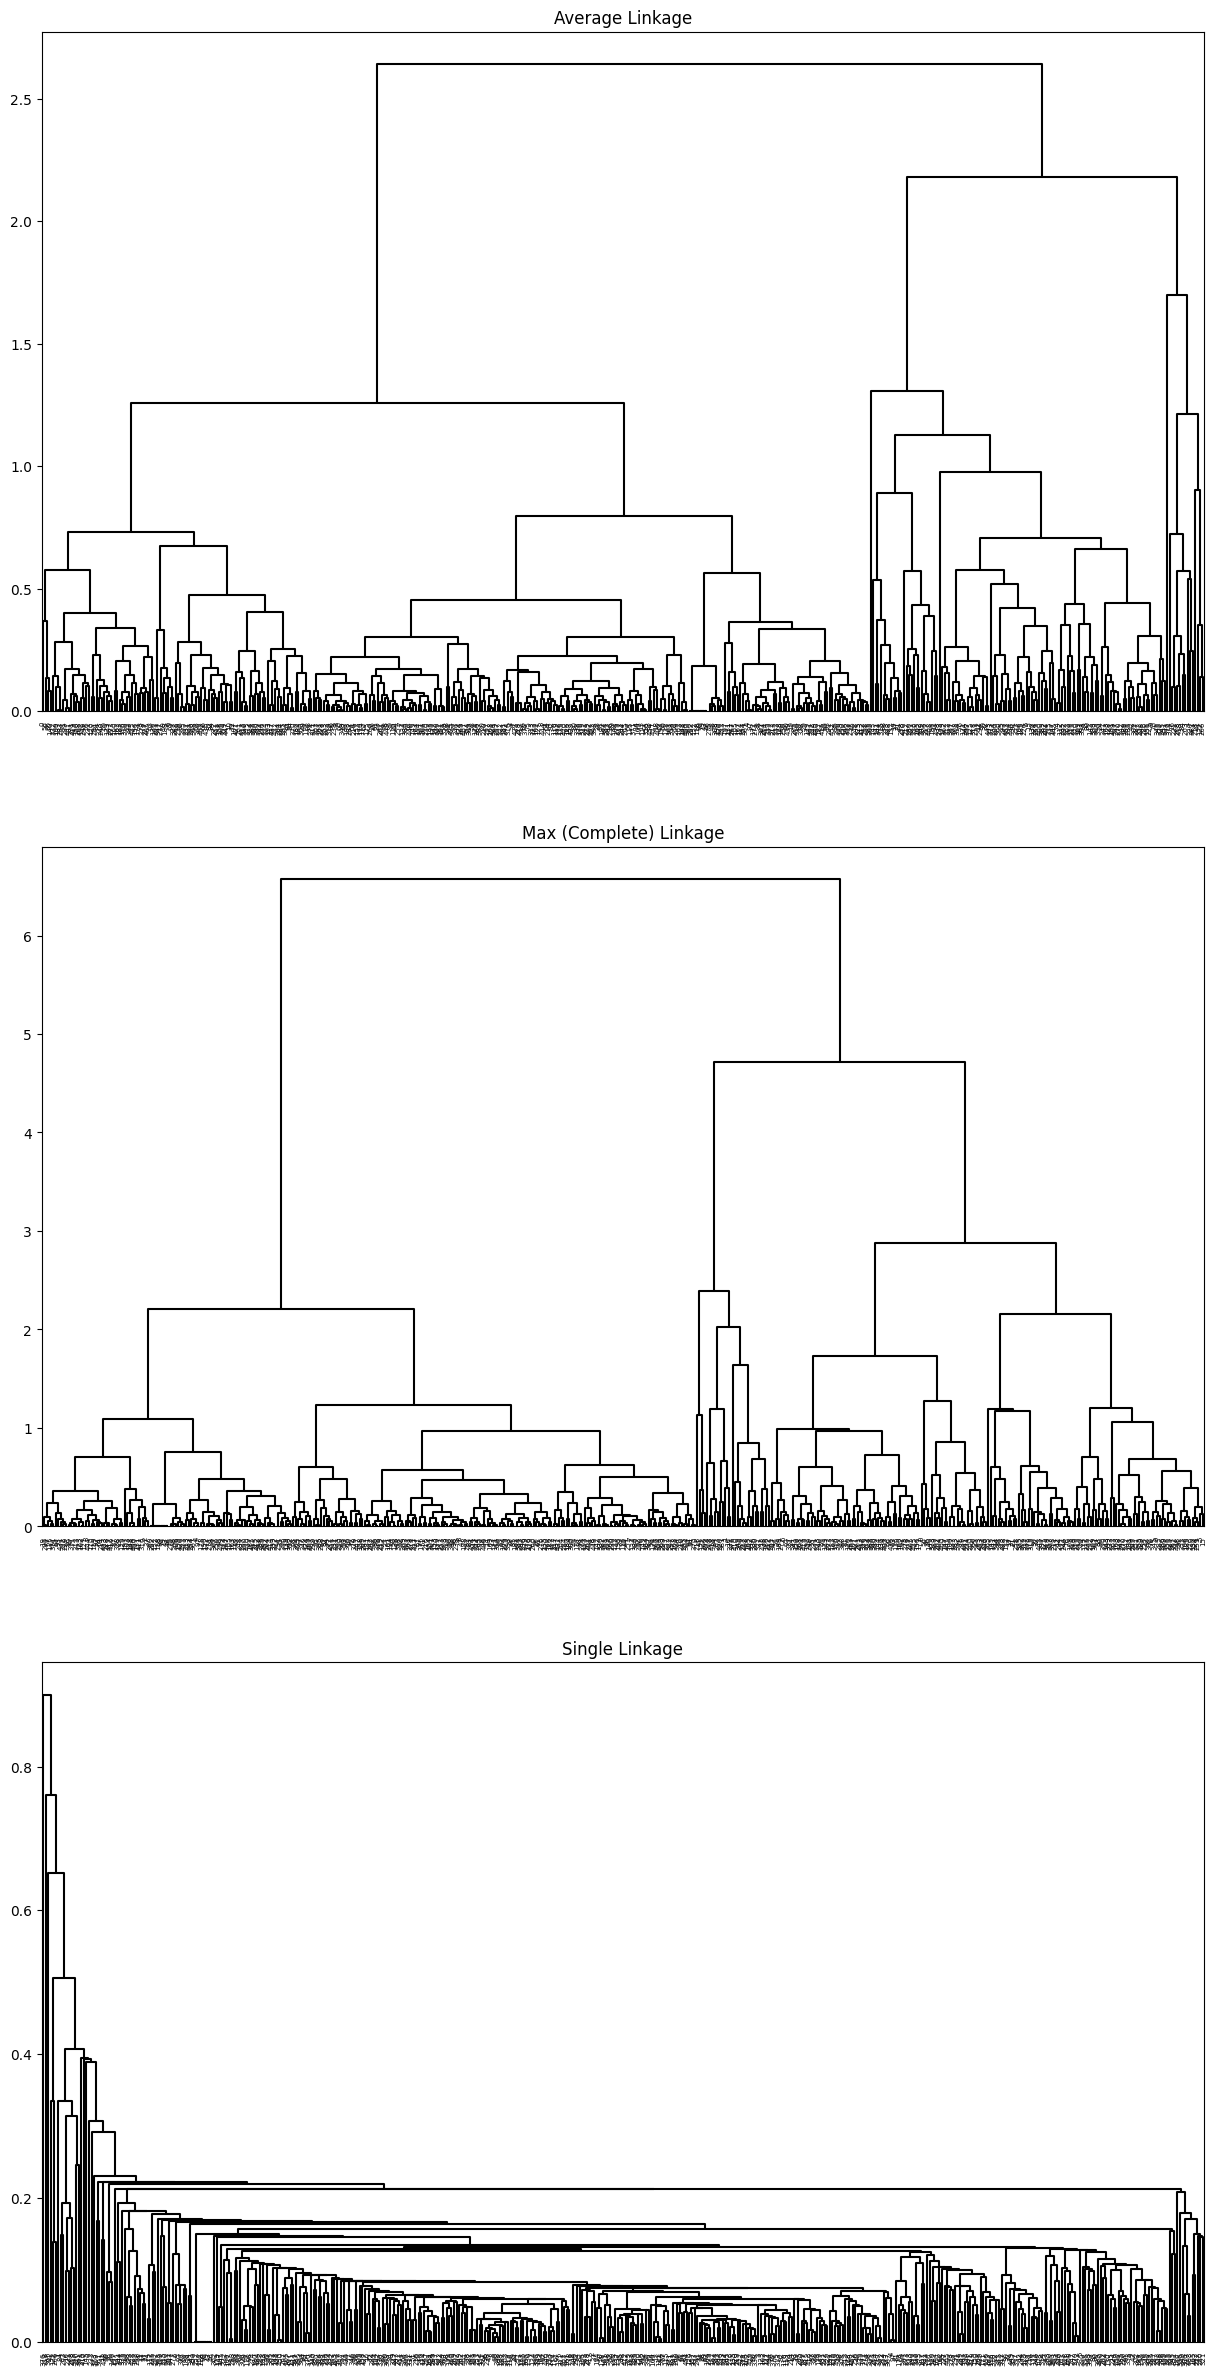

In [46]:

# Cargar el conjunto de datos de cáncer de mama
data = load_breast_cancer()
X = data.data
y = data.target
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalización de Datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Selección de Características
selector = SelectKBest(score_func=f_classif, k=2)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
# Crear instancias de clustering jerárquico con diferentes métodos de enlace
hc_avg = HClust(distance_threshold=0, n_clusters=None, linkage='average')
hc_max = HClust(distance_threshold=0, n_clusters=None, linkage='complete')
hc_sing = HClust(distance_threshold=0, n_clusters=None, linkage='single')
# Ajustar los modelos
hc_avg.fit(X_train_selected)
hc_max.fit(X_train_selected)
hc_sing.fit(X_train_selected)
# Calcular matrices de enlace para cada método
linkage_avg = linkage(X_train_selected, method='average')
linkage_max = linkage(X_train_selected, method='complete')
linkage_sing = linkage(X_train_selected, method='single')
# Función para visualizar el dendrograma
def plot_dendrogram(linkage_matrix, ax, cut=-np.inf, title='Dendrogram'):
    dendrogram(linkage_matrix, ax=ax, color_threshold=cut, above_threshold_color='black')
    ax.set_title(title)
# Visualizar dendrogramas
fig, axes = plt.subplots(3, 1, figsize=(15, 30))
plot_dendrogram(linkage_avg, axes[0], title='Average Linkage')
plot_dendrogram(linkage_max, axes[1], title='Max (Complete) Linkage')
plot_dendrogram(linkage_sing, axes[2], title='Single Linkage')
plt.show()

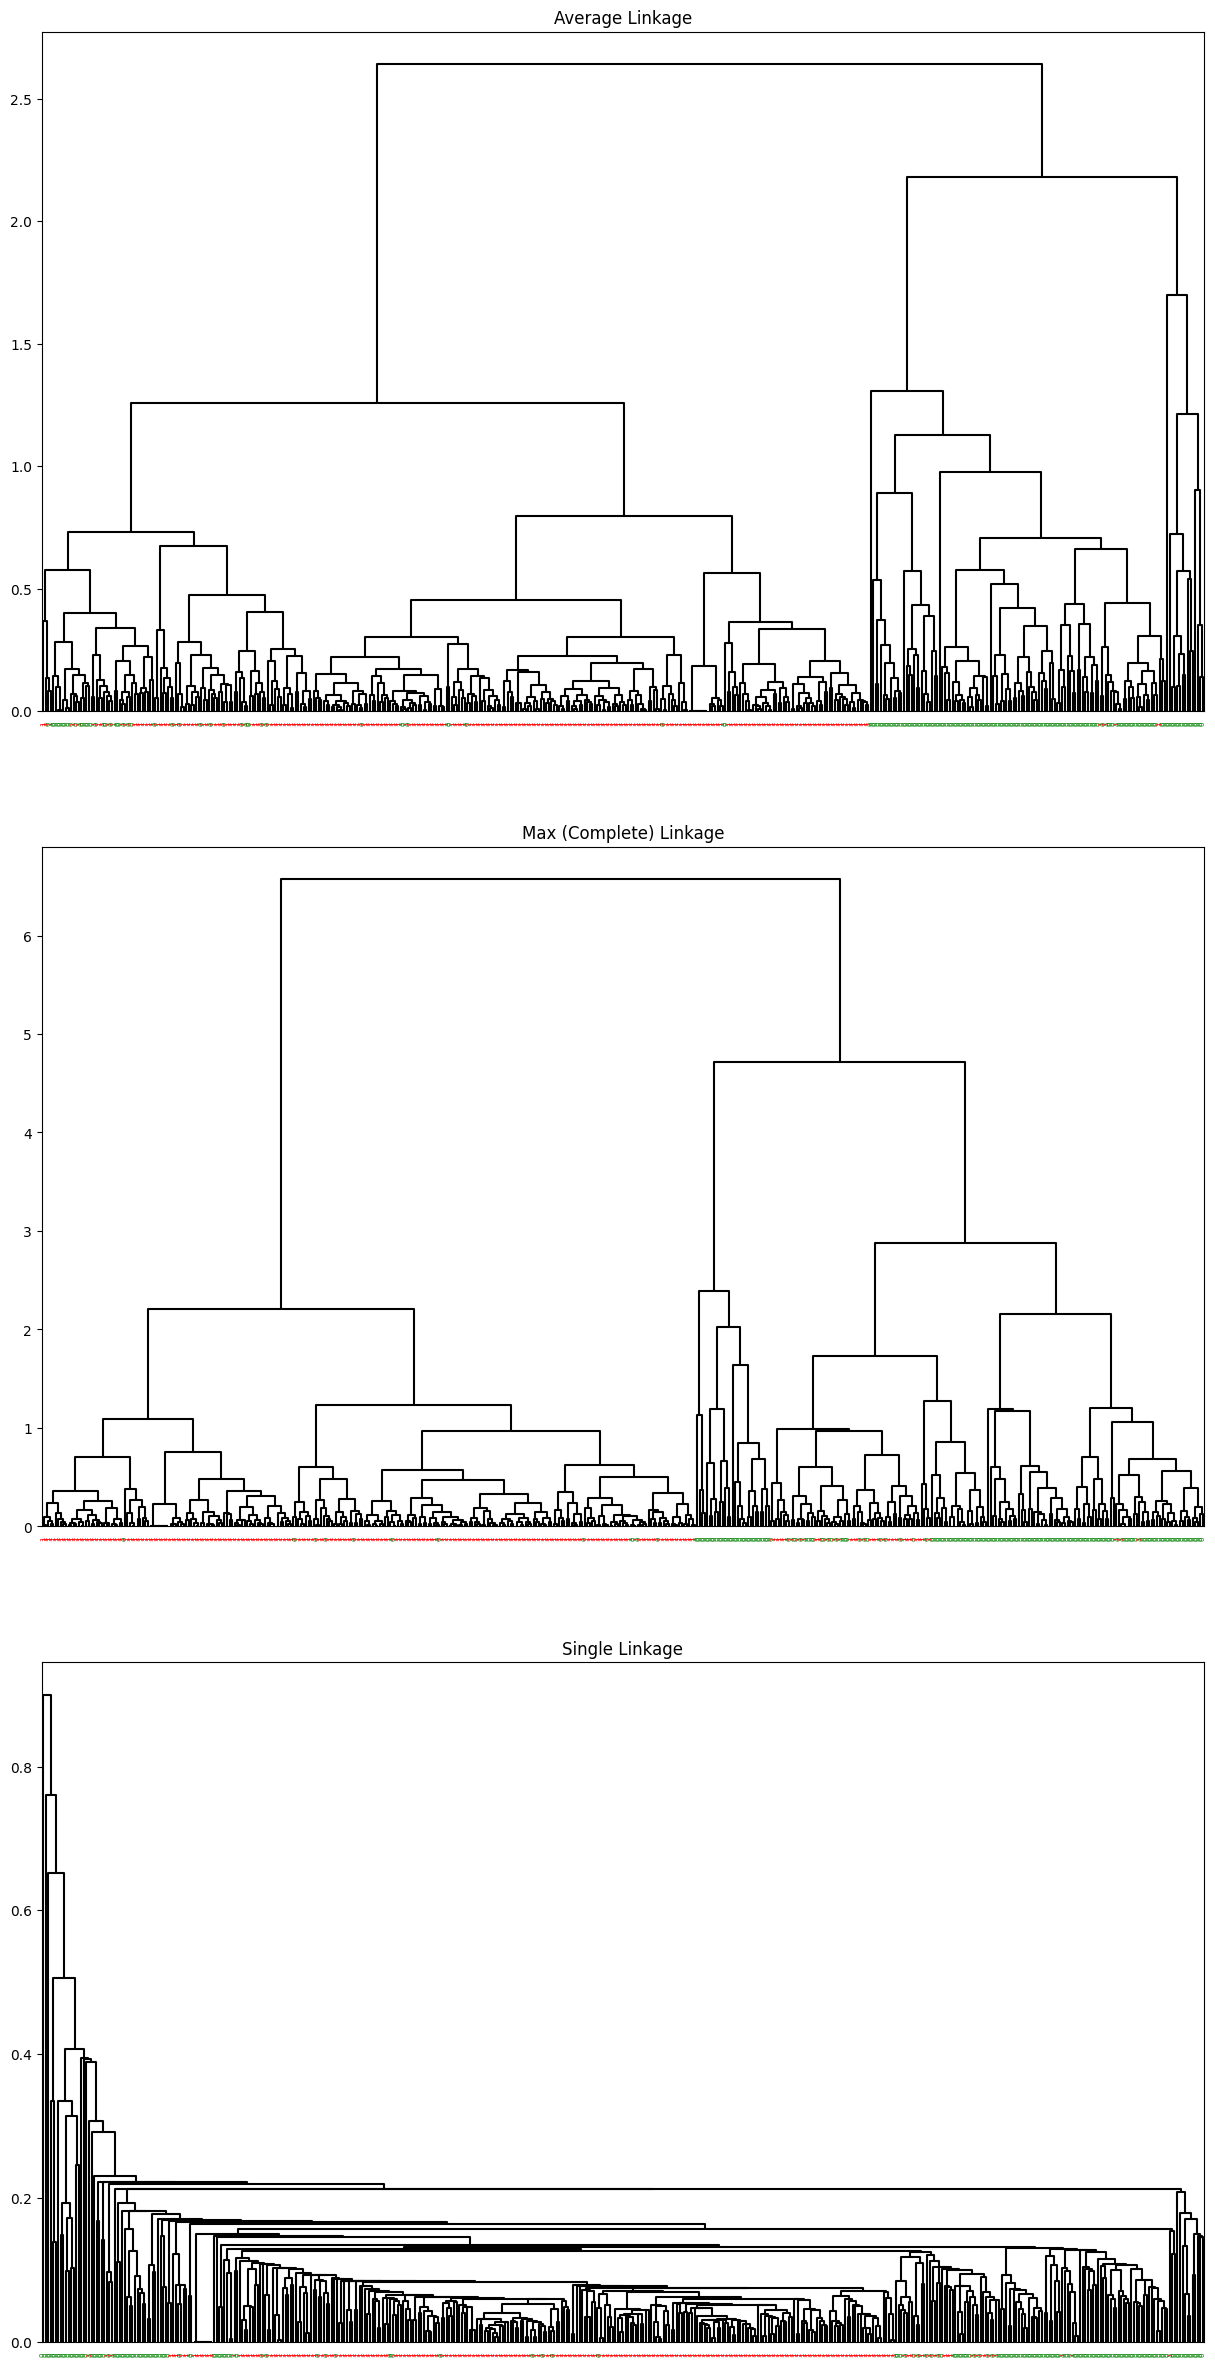

In [48]:
# Función para visualizar el dendrograma con colores para los targets
def plot_dendrogram_colored(linkage_matrix, ax, labels, cut=-np.inf, title='Dendrogram'):
    # Crear el dendrograma
    dendrogram(linkage_matrix, ax=ax, color_threshold=cut, labels=labels, above_threshold_color='black')

    # Asignar colores a las etiquetas de los targets
    for tick_label in ax.get_xticklabels():
        label_text = tick_label.get_text()
        label = int(label_text)
        color = 'r' if labels[label] == 0 else 'g'  # Target 0  (rojo), Target 1 (verde)
        tick_label.set_color(color)

    ax.set_title(title)

# Visualizar dendrogramas con colores para los targets
fig, axes = plt.subplots(3, 1, figsize=(15, 30))
plot_dendrogram_colored(linkage_avg, axes[0], y_train, title='Average Linkage')
plot_dendrogram_colored(linkage_max, axes[1], y_train, title='Max (Complete) Linkage')
plot_dendrogram_colored(linkage_sing, axes[2], y_train, title='Single Linkage')
plt.show()

Para mejorar la visualización e interpretación de los dendogramas, se asignaron como etiquetas en el eje x, colores diferentes para los targets 0 y 1, (rojo y verde respectivamente)

Como se puede observar de los dendogramas anteriores:

- Average Linkeage (distancia entre dos los clusters es el promedio de las distancias entre todos los pares de los elementos), en este caso, se puede observar que es menos sensible a outliers, se visualizan clusters mas equilibrados en comparación a Single Linkeage y los targets (color verde y rojo) fueron segmentados de forma mas ordenada en comparación a los demás linkeage.

- Max Linkeage (distancia más larga entre cualquier par de elementos de los clusters) creó clusters compactos, sin embargo es sensible a outliers y los targets 0 y 1 se encuentran distribuidos en mas clusters que en comparación a Average Linkeage.

- Single Linkeage (distancia más corta entre cualquier par de elementos de los clusters) creó clusters en cadena alargados, este linkeage es sensible a outliers y distribuyó los targets 0 y 1 en mas clusters en comparación a los demás Linkeage.

Tomando en cuenta lo visto en los dendogramas, el Clustering Jerárquico con Average Linkeage logró segmentar de mejor forma los target 0 y 1.

# K-means aplicado en Imagen

## Cargar imagen

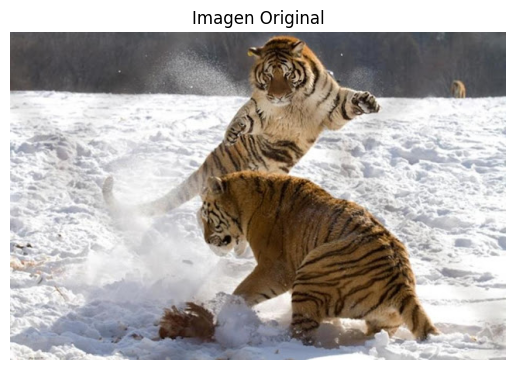

In [16]:
# Cargar y mostrar la imagen original
tigres = io.imread('tigres.jpg')
plt.imshow(tigres)
plt.axis('off')
plt.title('Imagen Original')
plt.show()

## Preparación de imagen

In [17]:
# Almacenar las dimensiones originales de la imagen
rows, cols, _ = tigres.shape #se obtienen las dimensiones de la imagen, el guión bajo '_' se utiliza para ignorar el tercer valor devuelto en shape, referido al número de canales utilizado en la imagen RGB, en este caso 3.

Antes de aplicar k-means, se debe preparar la imagen:
- Las imagenes RGB son representadas por 3 matrices (Rojo, Verde y Azul), el primer paso es transformar el arreglo 3D a uno 2D, es decir, una lista de pixeles RGB

In [18]:
# cambiar la forma de matriz de la imagen para que tenga 'rows*cols' como filas y 3 columnas. Esto hará que cada fila represente un píxel y las 3 columnas representan los canales R, G y B del píxel. 
tigres=tigres.reshape(rows*cols,3)


## Aplicación del modelo K-means

El siguiente paso es utilizar el algoritmo K-means para encontrar los colores principales:

In [19]:

sse = [] #Lista vacía donde se almacenarán la suma de errores cuadráticos SSE, para diferentes clusters.
for k in range(1, 11): #En cada iteración se aplicará k-means con un número diferente de clusters (k).
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tigres) #Se ajusta el modelo K-means a los datos de la imagen, los cuales fueron reformateados previamente como una lista de píxeles.
    sse.append(kmeans.inertia_) #Se agregra la suma de errores cuadráticos del modelo con el k correspondiente, a la lista sse.


c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

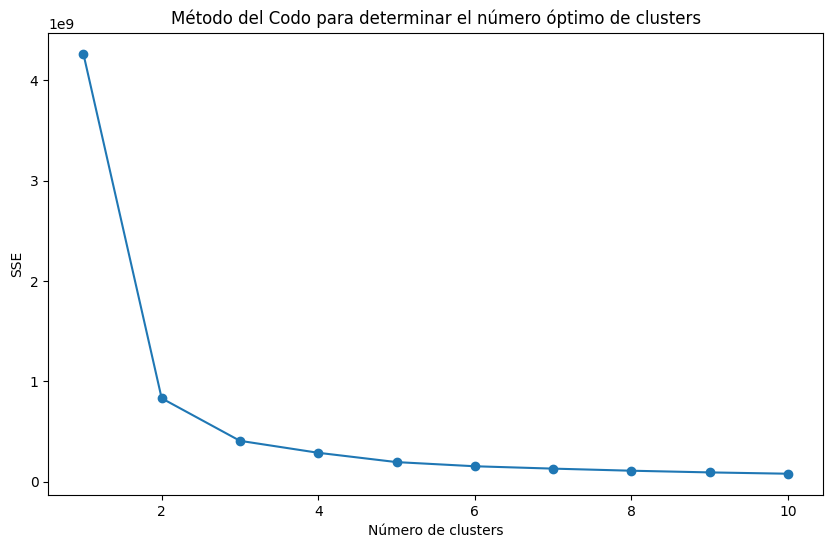

In [20]:
# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.show()

Considerando que cuanto menor sea el SSE, mejor será el modelo y además evitando el sobreajuste, se eligió como número apropiado de clusters para este caso: 3 clusters.

In [21]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(tigres) #se ajustó un nuevo modelo KMeans a los datos de la imagen con 3 clusters
colors = kmeans.cluster_centers_ #Extracción de los centros de los clusters, que representan los colores promedios de cada cluster
colors = colors.round(0).astype(int) # Redondear los valores de los colores y convertirlos a enteros para que sean válidos como valores de píxeles RGB



c:\Users\ferna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Paleta de colores

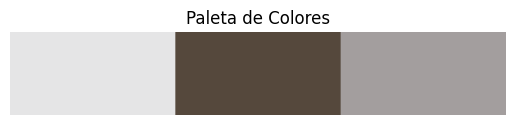

In [22]:

# Mostrar la paleta de colores
n_clusters=3
palette = np.zeros((50, 300, 3), dtype=np.uint8) #matriz con ceros, que servirá como lienzo para mostrar la paleta de colores 
steps = 300 // n_clusters #300= ancho total de la paleta, dividido por el número de clusters
for i in range(0, n_clusters): # En este ciclo for, se llena la paleta con los colores de cada cluster
    palette[:, i*steps:(i+1)*steps, :] = colors[i]
plt.imshow(palette)
plt.axis('off')
plt.title('Paleta de Colores')
plt.show()

- La paleta de colores representa el número de clusters existentes posterior a aplicar el modelo K-means a la imagen original 
- Cada color en la paleta representa uno de los cluster, en este caso, los píxeles de la imagen original serán agrupados en 3 clusters (gris claro, café y gris plomo)


In [23]:

# Reconstruir la imagen
labels = kmeans.predict(tigres) #se utiliza el algoritmo K-means para asignar a cada píxel de la imagen original un cluster.
image_reconstructed = np.zeros((rows, cols, 3), dtype=np.uint8) #Creación de una matriz de ceros del mismo tamaño que la imagen original para almacenar la imagen reconstruida
labels = labels.reshape(rows, cols) # Se cambia la forma de la matriz de labels, para que sea coincidente con las dimensiones de la imagen original
for i in range(rows):
    for j in range(cols):
        image_reconstructed[i, j, :] = colors[labels[i, j]] # Recorre cada píxel de la imagen original y se le asigna el color del cluster correspondiente al píxel de la imagen reconstruida.


### Imagen reconstruida:

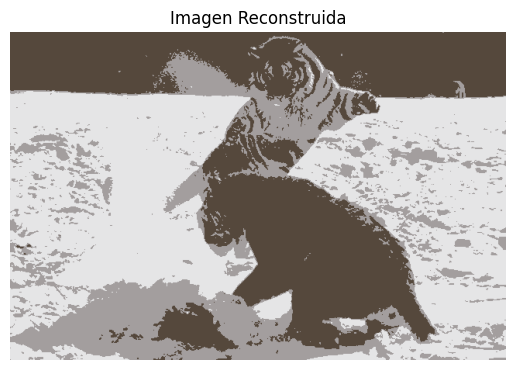

In [24]:
# Mostrar la imagen reconstruida
plt.imshow(image_reconstructed)
plt.axis('off')
plt.title('Imagen Reconstruida')
plt.show()